# A comedy handbook - results notebook.

In this notebook, you will find the final results surrounding our project of making a comedy handbook.

This notebook can be used to recreate all the graphs and conclusions shown in [our data story](https://epfl-ada.github.io/ada-2024-project-adaptables/).

Have a good read!

*- The ADAptables team*

---

## 0: Imports and dependencies

This project was run using Python 3.10.12. We cannot provide certainty that other versions will work (though anything newer should be fine). Some of our code elegantly uses Python's [pattern matching](https://peps.python.org/pep-0636/), which was introduced in 3.10. Earlier Python versions will therefore not work out of the box (but can be adapted by making very small changes).

First, make sure to have installed all requirements by running `pip install -r pip_requirements.txt`, or alternatively uncommenting and running the following cell:

In [1]:
# Uncomment to install all required packages
# !pip install -r pip_requirements.txt

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Change src.utils.constants.NOTEBOOK_CONFIG.USE_MATPLOTLIB to false if you want interactive, plotly graphs!

In [14]:
from src import *

### Dataset description and loading

In [5]:
describe_datasets(ALL_DATASETS)

We will use 7 datasets in total, namely CMU Movies, CMU characters, CMU plots, Massive Rotten Tomatoes Movie metadata, Massive Rotten Tomatoes Reviews, Extra Rotten Tomatoes Movies, Oscard Awards.          
 Here is a decription of all of them:
- 1️⃣ CMU Movies

Base dataset for ADA. Contains ~80K movies and their metadata.

+--------------------+------------------------------------------+
|   Column/Fearure   | Description                              |
+--------------------+------------------------------------------+
|    wikipedia_id    | A UID for the movie on Wikipedia.        |
|                    |                                          |
|    freebase_id     | A UID for the movie in Freebase          |
|                    | (https://freebase.toolforge.org/)        |
|                    |                                          |
|       title        | The title of the movie.                  |
|                    |                                          |
|    release_

In [6]:
preload_datasets(ALL_DATASETS)

Preloading datasets...: 100%|██████████| 7/7 [00:09<00:00,  1.33s/it]



# Part I. Defining our objective : what is a good comedy?

## Sentiment Analysis

This subpart aims to answer the following questions:

* What are the keys to determine objectively if a movie is good (both in terms of quality and popularity) ? 
* Are the ratings of big critic sites accurate ?
* Do they accurately reflect the true impressions of a viewer ? 


In [7]:
part_one_args = [EDI.mrtrev_sa_df, 'originalScore', 'sa', 'id', EDI.mrt_cmu_expertrevd_comedy_ids]
i = 0

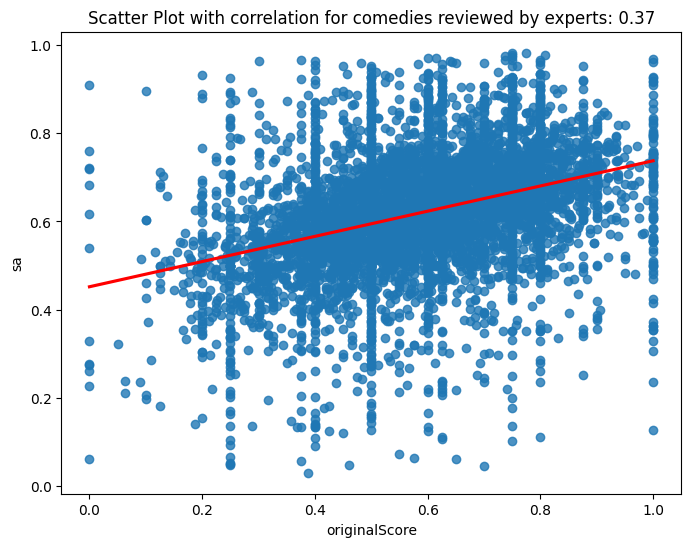

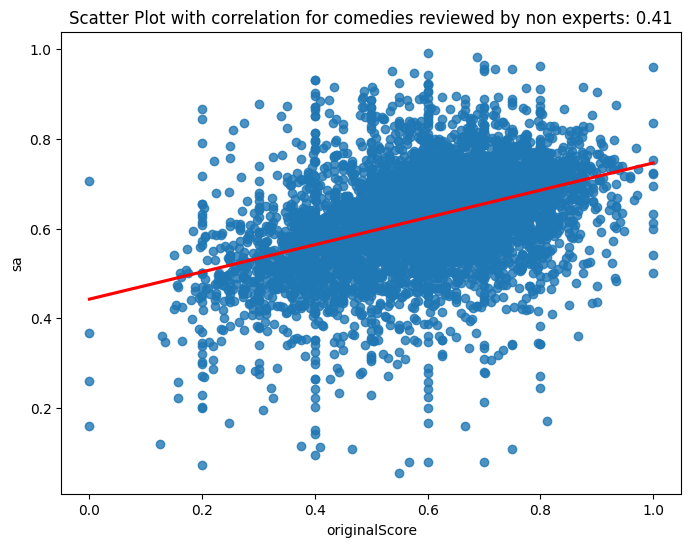

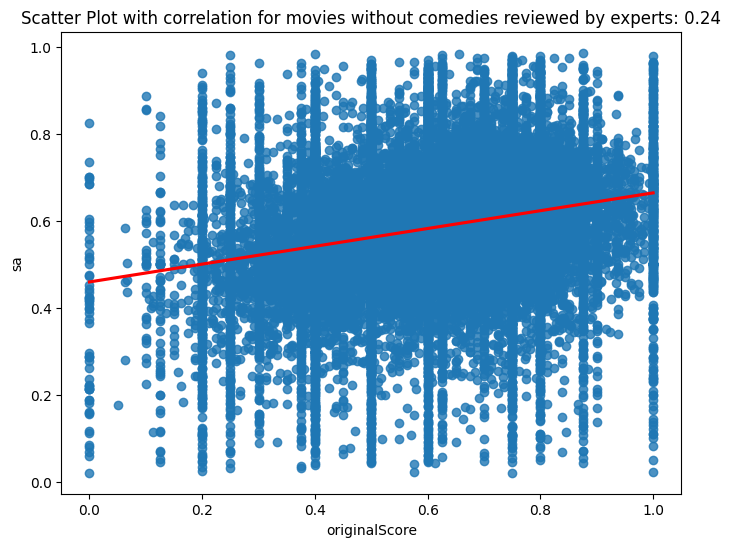

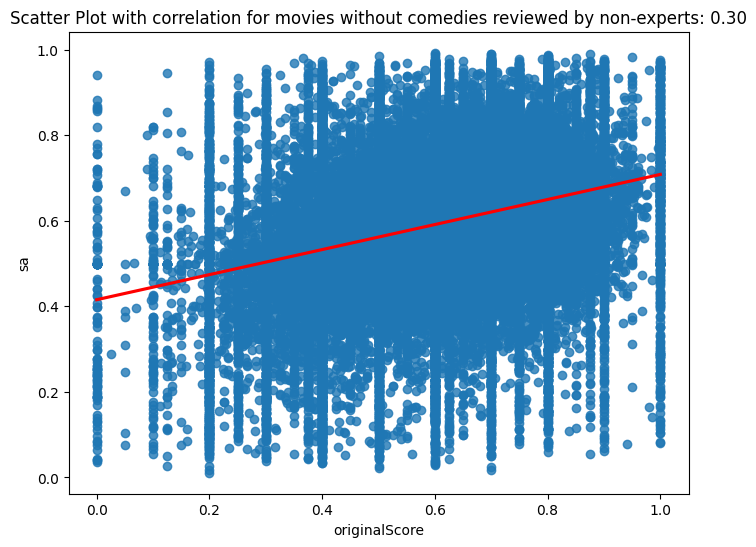

In [8]:
i+=1
i=show_all(i=i,fig_lst=mrt_get_scatterplots(*part_one_args))

The correlation between the sentiment analysis mean scores and the ratings of the user is quite low (<0.4) and does not permit drawing conclusions on the accuracy of these factors to validate if a movie is ‘good’. Indeed, low correlation value and high spreading of the points show that a rating does not necessarily reflect the sentiment transmitted by the review. A bias that could have been expected would be to observe more positive sentiment for comedies than for other types of movies. Even though the 2 groups are significantly different, statistically speaking, comedies do not display much higher sentiment scores than other types of movies.

T-Statistic: 14.74
P-Value: 0.0000
Conclusion: Significant difference between the two groups.
              count      mean       std      min       25%       50%  \
Group                                                                  
Comedy       5580.0  0.619087  0.140349  0.03090  0.539421  0.625339   
Non-Comedy  33805.0  0.588119  0.172688  0.01145  0.500000  0.596907   

                 75%      max  
Group                          
Comedy      0.705303  0.98225  
Non-Comedy  0.700950  0.98600  
T-Statistic: 13.24
P-Value: 0.0000
Conclusion: Significant difference between the two groups.
              count      mean       std      min       25%       50%  \
Group                                                                  
Comedy       5626.0  0.621556  0.117788  0.05575  0.551984  0.629141   
Non-Comedy  57549.0  0.598496  0.180355  0.01030  0.500000  0.607507   

                 75%      max  
Group                          
Comedy      0.700033  0.99205  
Non-Comedy

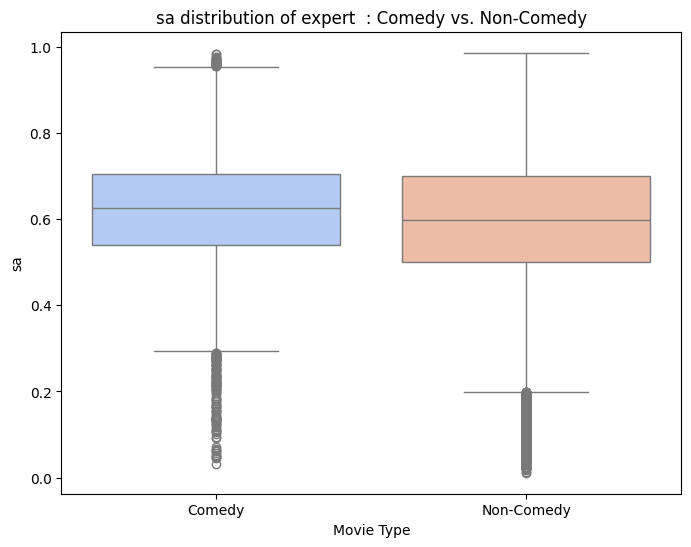

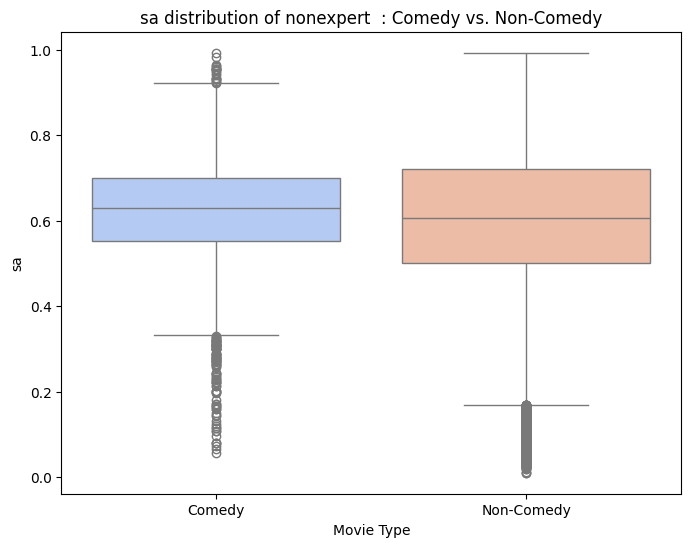

In [9]:
i+=1
i=show_all(i=i,fig_lst=mrt_get_boxplots(*part_one_args))

This leads to a popularity analysis based on less subjective values such as the box office revenues, the obtention of awards.

___

## Critical success throughout the world - oscars and awards

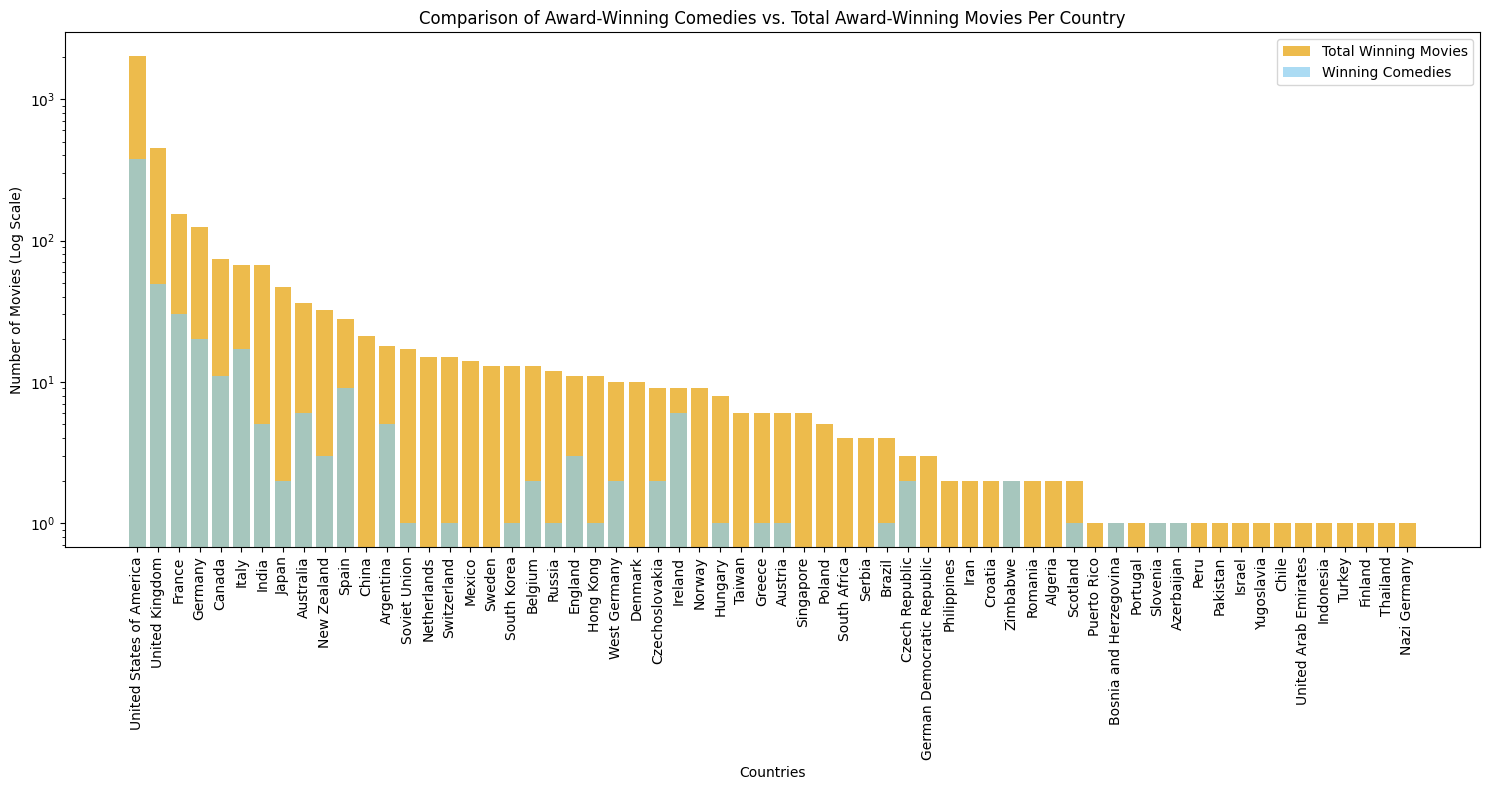

In [10]:
i+=1
i=show_all(i=i,fig_lst=[osc_get_awrd_win_comp(CMU_MOVIES_DS.df,OSCAR_AWARDS_DS.df)])

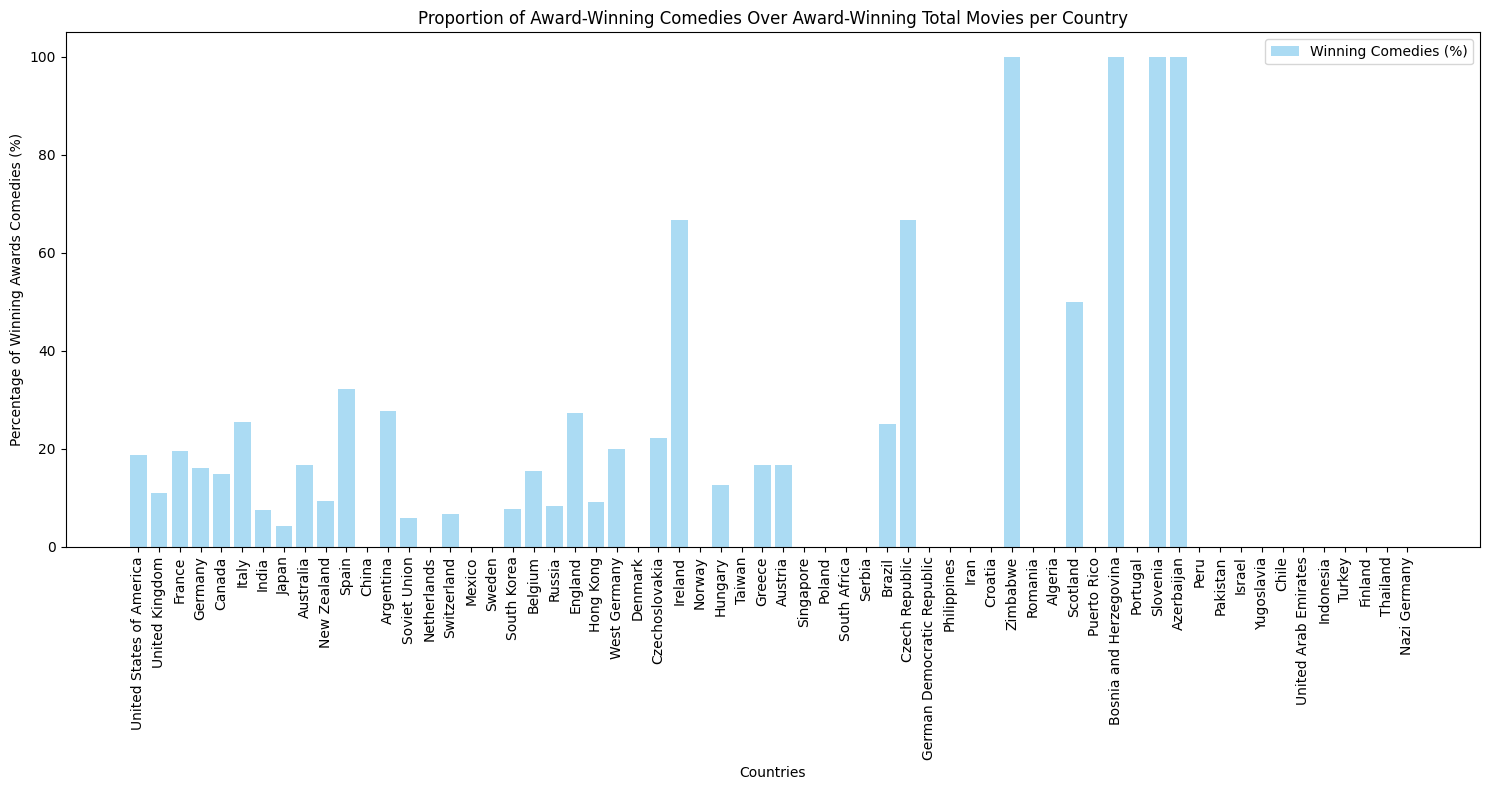

In [11]:
i+=1
i=show_all(i=i,fig_lst=[osc_get_awrd_win_prop(CMU_MOVIES_DS.df,OSCAR_AWARDS_DS.df)])

We can try to quantify the critically acclaimed success for comedy by looking at the Oscar nominations and wins. If we look only at the percentage of award winning comedies over the total number of award winning movies per country to find where the best comedies are made, we find some surprising results. Some countries like Slovenia, Azerbaijan, Zimbabwe, Bosnia and Herzegovina have a 100% result which means that every oscar winning by movies in these countries are from comedies. However when we look at the second graph we can understand that those countries have such a high score because they only won one Oscar and it happened to be a comedy. We can contrast the precedent result by looking at the tradeoff between the number of movies critically acclaimed and the percentage of them that are comedies, in this case Ireland looks like a good destination for finding a well critically received comedy !

___

##  Commercial success throughout the world

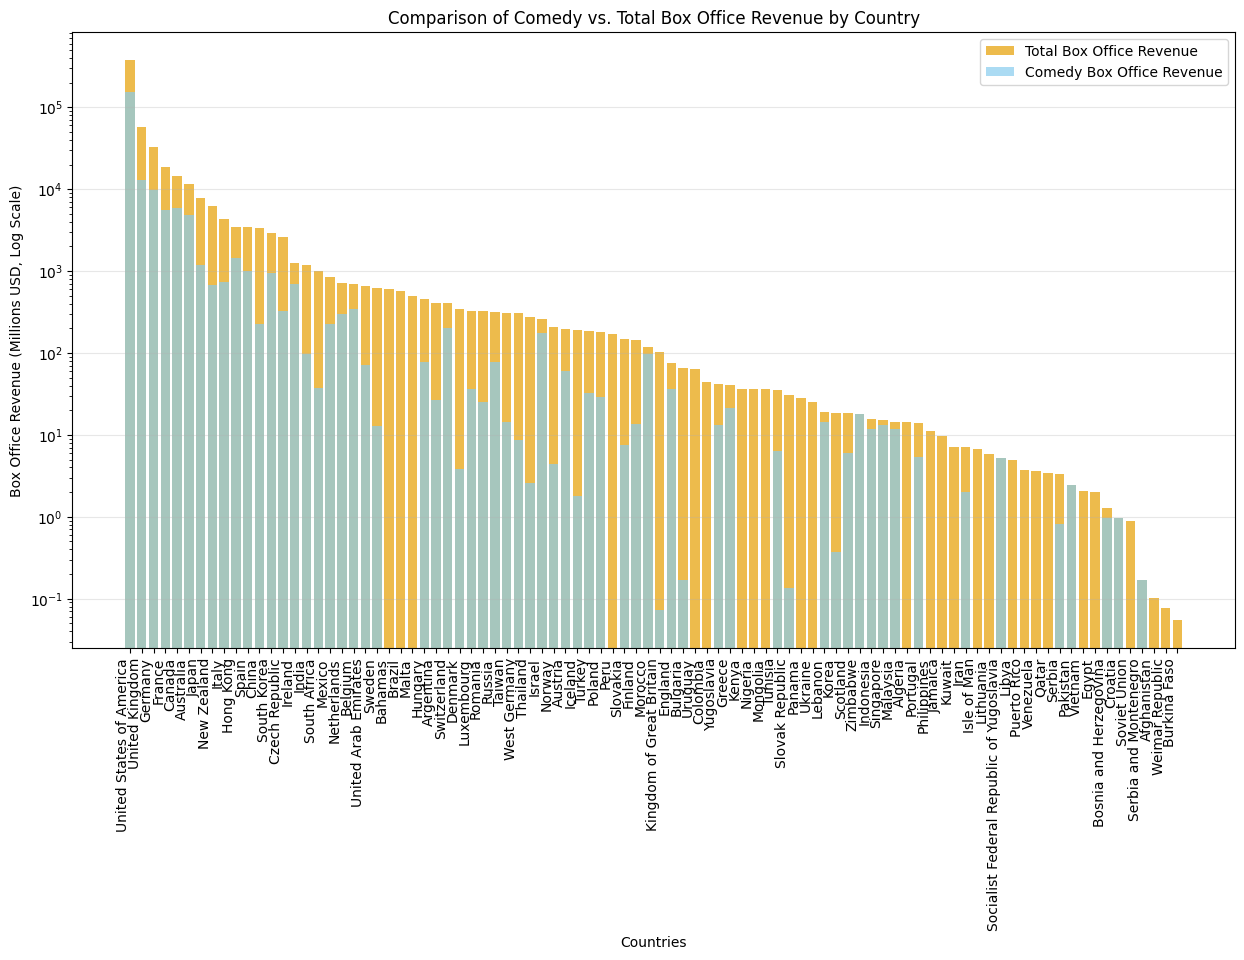

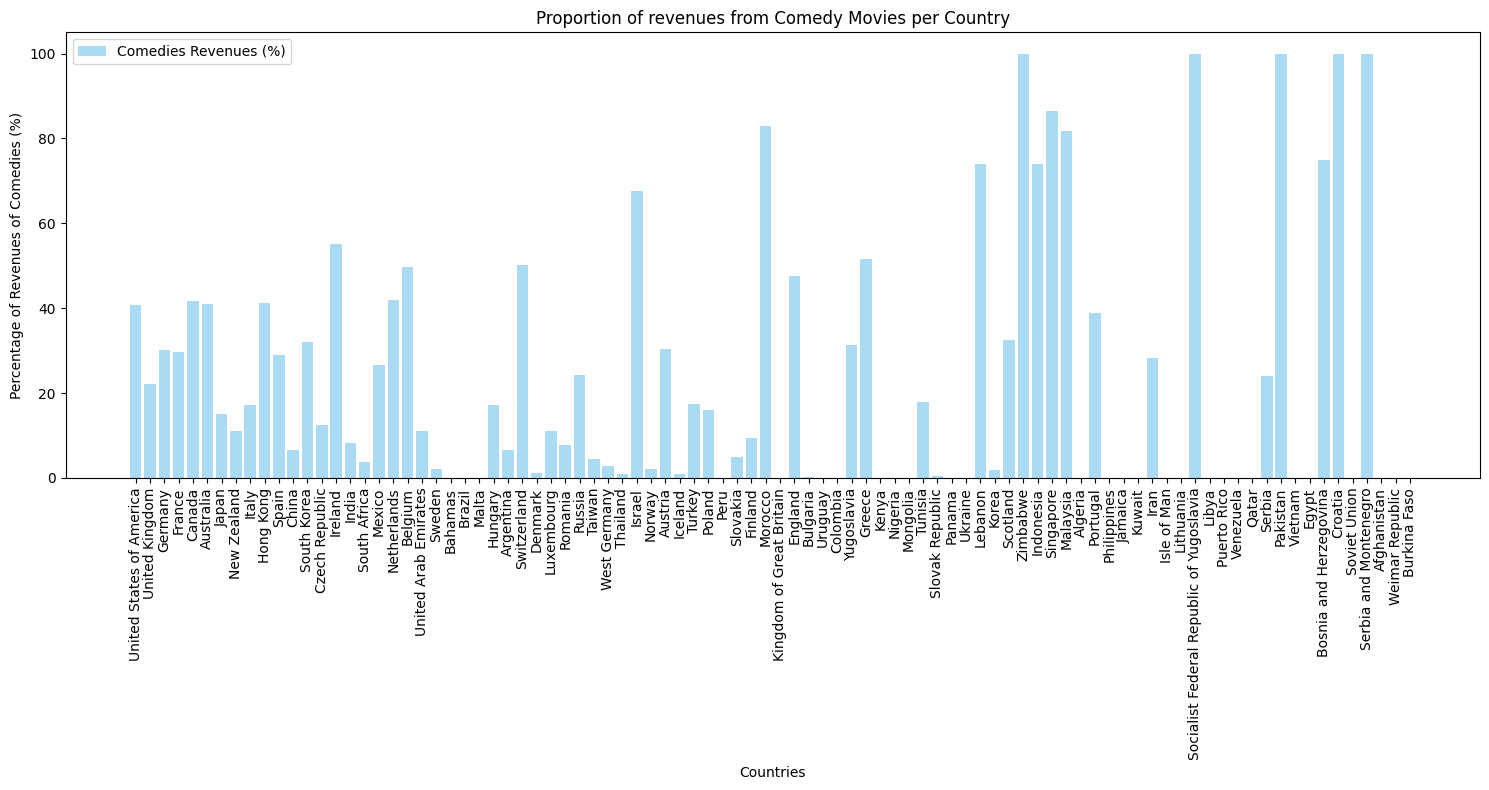

In [12]:
i+=1
i=show_all(i=i,fig_lst=[osc_get_total_bo_per_country(CMU_MOVIES_DS.df),osc_get_prop_bo_per_country(CMU_MOVIES_DS.df)])

Comedy consistently contributes to box office revenues across countries, with some nations showing particularly strong reliance on this genre. For example, even though comedies revenues represent a smaller percentage of the United States of America box office revenues than Serbia and Montenegro we can see that in absolute value since the United State of America produces such an important part of the movies it is still more profitable to make a comedy in the USA rather than in Serbia or Montenegro.


___
## Popularity and rating correlation
Finally, let us at how popularity and audience score are correlated:

<Figure size 800x600 with 0 Axes>

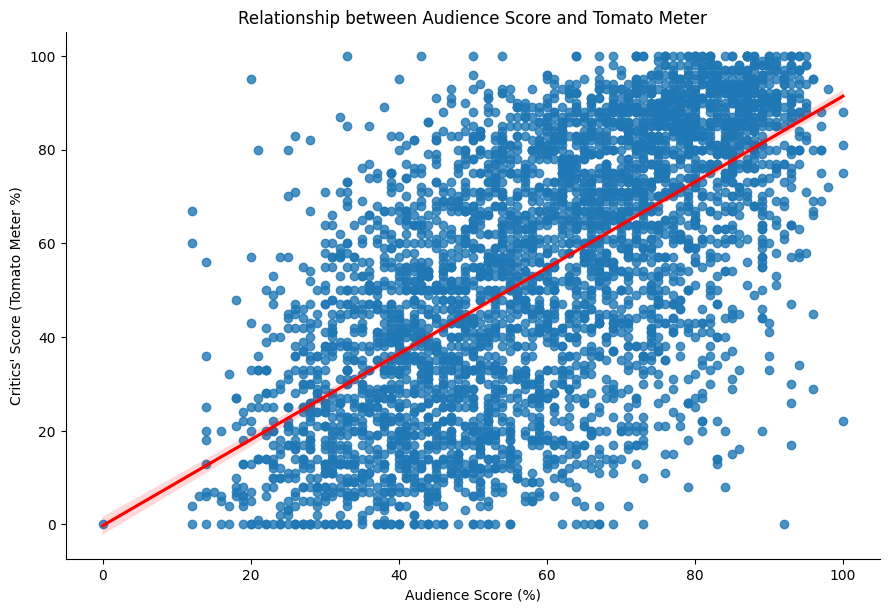

In [16]:
i+=1
i=show_all(i=i,fig_lst=[get_rt_audience_tomato_corr(MASSIVE_RT_MOVIE_DS.df)])

The scatter plot illustrates the relationship between audience scores (X-axis) and critics' scores (Tomato Meter, Y-axis) for comedies. A clear positive correlation is visible, it shows significant variability and underlines the difference between experts and non-experts.
Insight : Audience and critic perceptions often diverge, a good score from both of them brings us close to  what could be called a ‘good’ comedy.

# Part II. The components of a good comedy

## Plot topic evolution


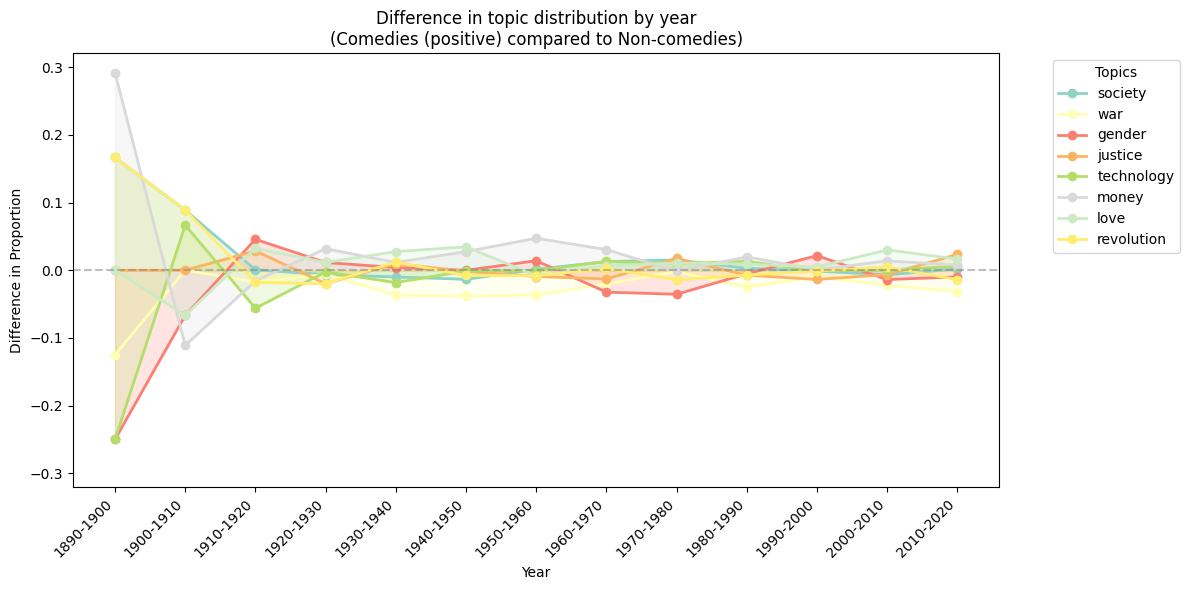

In [ ]:
i+=1
i = show_all(i=i,fig_lst=[cmu_plots_get_topic_distributions(EDI.cmu_plots_topics,EDI.topics)])

/home/vigarov/ada/submission/src/plots/plot.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comedies_w_topicMemberships['group_bin'] = pd.cut(


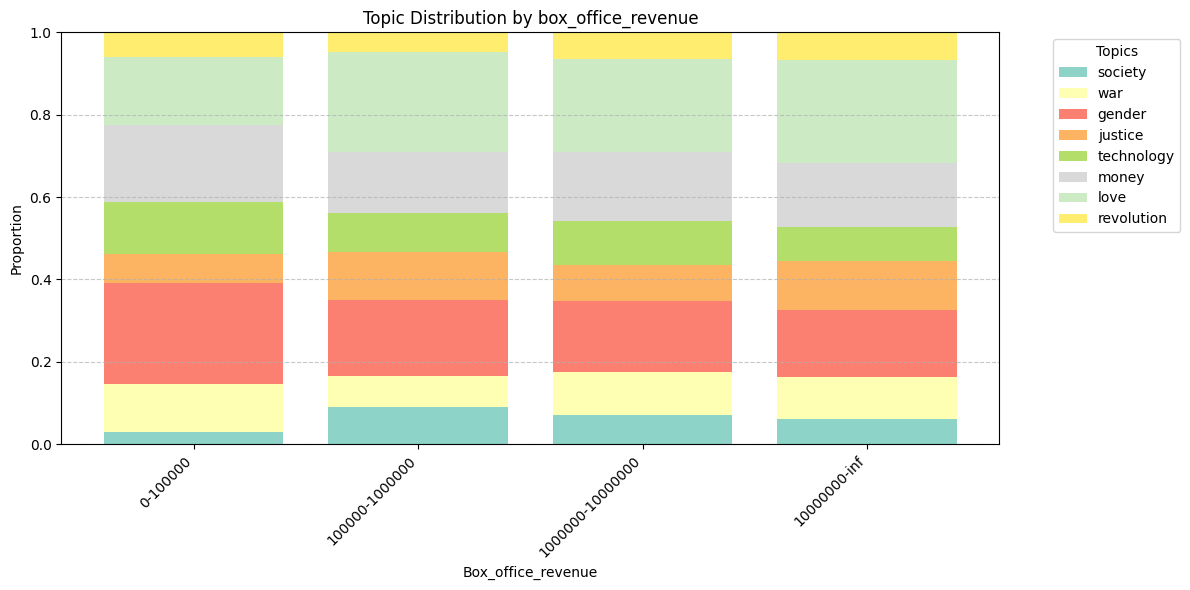

In [ ]:
i+=1
i = show_all(i=i,fig_lst=cmu_plots_get_money_distr(EDI.cmu_plots_topics,EDI.topics))

___

## Popular genres

<Figure size 1500x800 with 0 Axes>

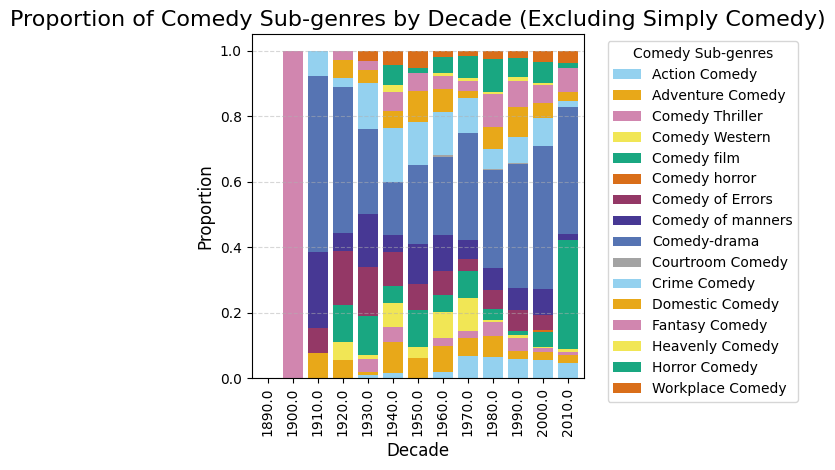

In [ ]:
i+=1
i=show_all(i=i,fig_lst=[cmu_get_genres_split(CMU_MOVIES_DS.df)])

We can see the evolution of the genres that can be found in comedy movies throughout the decades

___

## Genres combination -> QUENTIN

___

## Cast -> CARO

___

## Sequels -> Caro

___

## Subgenre Production

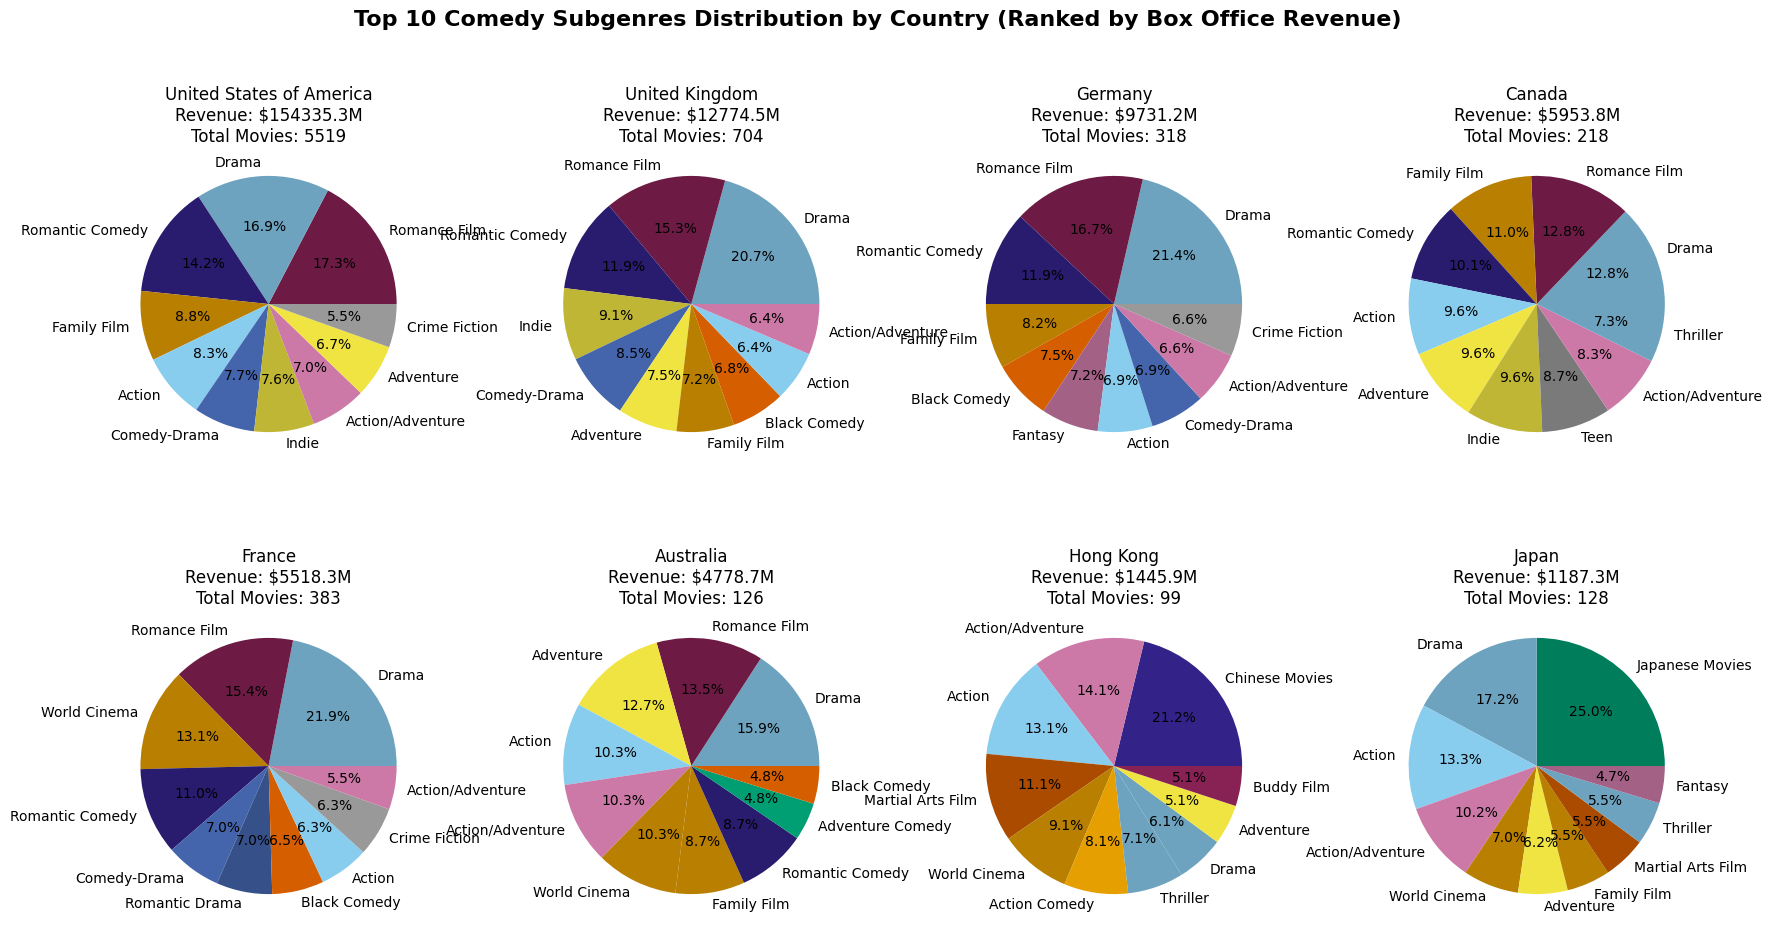

In [ ]:
i+=1
i=show_all(i=i,fig_lst=[cmu_subgenre_get_multi_pies(CMU_MOVIES_DS.df)])

Depending on the movie where the movie is produced and associated, some genres have more success than others. For example if we were to make a comedy in the USA if we want to maximize our chances of success, we should make a “romance film” but in France we should make a “drama” comedy.

___
## Title impact -> Caro world map

# Part III. Timing is everything

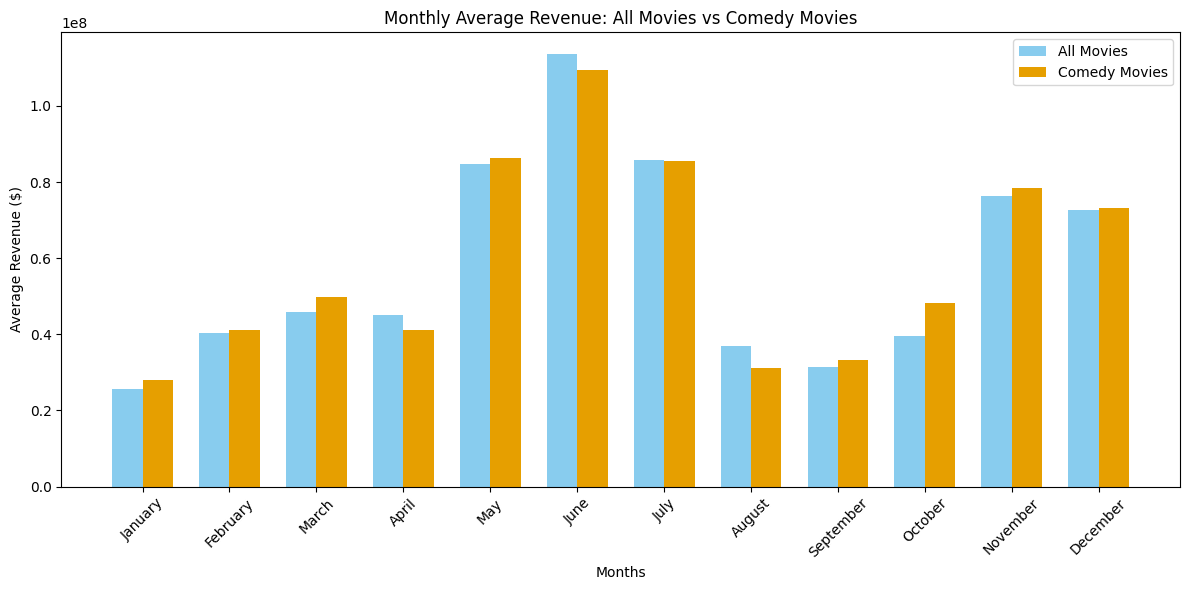

In [ ]:
i+=1
i=show_all(i=i,fig_lst=[cmu_monthly_get_rev(CMU_MOVIES_DS.df)])

From the graph above we can see that if we want our movie to work well in the box office we should release it in the theaters in June. It would have been the same if it was not a comedy movie. 

Actually we can see that since the 1980’s the proportion of comedy movies released is much lower than the proportion of revenues that the comedy movies generate and thus they are a lucrative and popular kind of movies. 

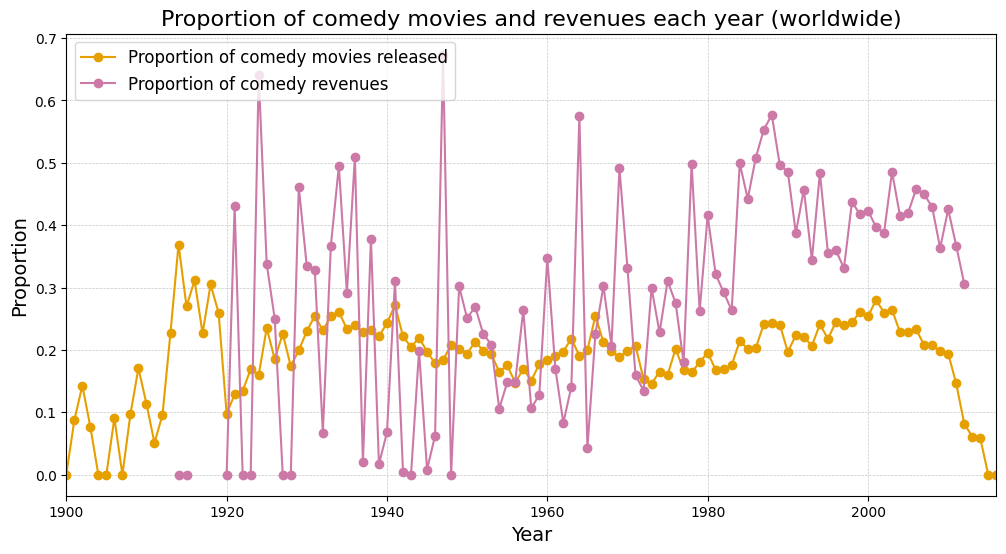

In [ ]:
i+=1
i=show_all(i=i,fig_lst=[cmu_yearly_get_dual_trends(CMU_MOVIES_DS.df)])